#### 1. Импорт pandas. Загрузка датасета, используя ; в качестве разделителя. Столбцы start_at, end_at, arrived_at прочитать как даты. 

In [1]:
import pandas as pd

In [2]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_3_python/3_taxi_peru.csv', sep=';',
                  parse_dates=['start_at', 'end_at', 'arrived_at'])

In [4]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [5]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


#### 2.  С какой платформы было сделано больше всего заказов. В ответе значение в %, округлённое до целого.

In [6]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [7]:
import numpy as np

In [8]:
np.round(taxi.source.value_counts() / len(taxi) * 100)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

#### 3. Визуализировать показатели. Агрегировать данные и построить барчарт, где по оси x расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [9]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() 
               .rename({'index':'source', 'source':'cnt'}, axis='columns')
              )

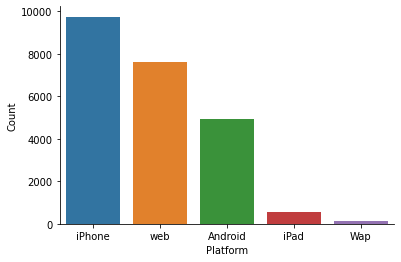

In [17]:
ax = sns.barplot(x="source", y = "cnt", data =taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

#### 4. Визуализация с применением альтернативного варианта построения распределения категориальной переменной – sns.countplot. Какой тип поездки (icon) встречался чаще всего?

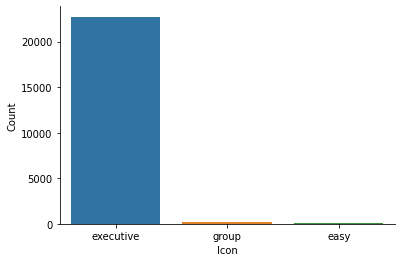

In [19]:
a = sns.countplot(x='icon', data=taxi)
a.set(xlabel='Icon', ylabel='Count')
sns.despine()
plt.show()

#### 5. Визуализация распределения переменной end_state (итоговое состояние заказа) в разбивке по платформам (source) с помощью sns.countplot и параметра hue.

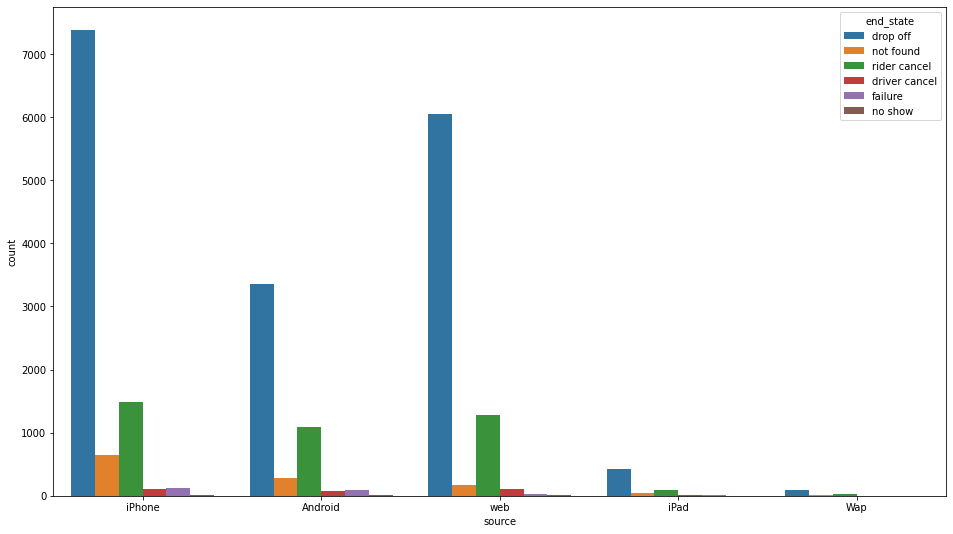

In [20]:
plt.figure(figsize=(16,9))
sns.countplot(data=taxi, hue='end_state', x='source')
plt.show() 

- Больше всего заказов со статусом drop off совершено с платформы iPhone
- На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone
- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone

#### 6. Распределение оценки водителей (driver_score). Проверить и построить график.

1. Посчитать частоту встречаемости каждой из оценок
2. Перевести в проценты и округлить до 2 знаков после точки (.mul(100).round(2))
3. Сбросить индексы
4. Переименовать колонки в driver_score и percentage
5. Отсортировать по driver_score в порядке возрастания (от 0 до 5)
6. Записать результат в driver_score_counts

In [21]:
taxi.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [23]:
driver_score_counts = taxi.driver_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'driver_score' : 'percentage',
                              'index' : 'driver_score'})\
             .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


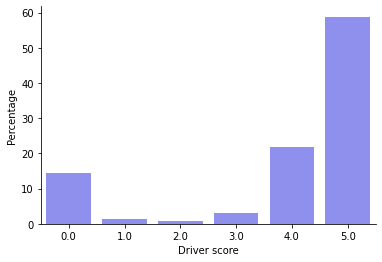

In [25]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

#### 7. Проделать аналогичные шаги для rider_score (оценок клиентов водителями), построить график. В чем его отличие от распределения оценок водителей?

In [24]:
rider_score_counts = taxi.rider_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'rider_score' : 'percentage',
                              'index' : 'rider_score'})\
             .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


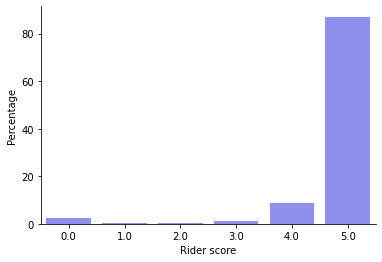

In [26]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show()

- Водители ставят меньше 0, чем клиенты
- Более чем в 80% случаев водители поставили клиентам 5 звездочек